In [35]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
!pip install sentence-transformers datasets transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 29.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [37]:
! mkdir ~/.kaggle

In [38]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [39]:
! chmod 600 ~/.kaggle/kaggle.json

In [40]:
! kaggle datasets download debarshichanda/goemotions

Dataset URL: https://www.kaggle.com/datasets/debarshichanda/goemotions
License(s): CC0-1.0


In [41]:
# Put on the same directory
from zipfile import ZipFile

# specifying the name of the zip file
file = "/content/goemotions.zip"

# open the zip file in read mode
with ZipFile(file, 'r') as zip:
    # list all the contents of the zip file
    # zip.printdir()

    # extract all files
    print('extraction...')
    zip.extractall()
    print('Done!')

extraction...
Done!


In [ ]:
import pandas as pd

df = pd.read_parquet("hf://datasets/google-research-datasets/go_emotions/raw/train-00000-of-00001.parquet")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'TypeError: Failed to fetch'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211225 entries, 0 to 211224
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   text                  211225 non-null  object 
 1   id                    211225 non-null  object 
 2   author                211225 non-null  object 
 3   subreddit             211225 non-null  object 
 4   link_id               211225 non-null  object 
 5   parent_id             211225 non-null  object 
 6   created_utc           211225 non-null  float32
 7   rater_id              211225 non-null  int32  
 8   example_very_unclear  211225 non-null  bool   
 9   admiration            211225 non-null  int32  
 10  amusement             211225 non-null  int32  
 11  anger                 211225 non-null  int32  
 12  annoyance             211225 non-null  int32  
 13  approval              211225 non-null  int32  
 14  caring                211225 non-null  int32  
 15  

In [ ]:
df.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
import pandas as pd
import numpy as np
import nltk
import re
import string

nltk.download('wordnet')
nltk.download('omw-1.4')

# Load datasets
df_1 = pd.read_csv('/content/data/full_dataset/goemotions_1.csv')
df_2 = pd.read_csv('/content/data/full_dataset/goemotions_2.csv')
df_3 = pd.read_csv('/content/data/full_dataset/goemotions_3.csv')

# Function to clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text.strip()

# Minimum word count for meaningful sentences
MIN_WORD_COUNT = 3

# Function to preprocess and filter each DataFrame
def preprocess_dataframe(df):
    # Filter rows where 'example_very_unclear' is False
    df = df[df['example_very_unclear'] == False]

    # Strip spaces from column names and values, clean text
    df.columns = df.columns.str.strip()
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    df['text'] = df['text'].apply(lambda x: x.replace("\\r", ""))
    df['text'] = df['text'].apply(lambda x: clean_text(x))

    # Drop unnecessary columns
    df = df.drop(columns=['id', 'author', 'subreddit', 'link_id', 'parent_id',
                          'created_utc', 'rater_id', 'example_very_unclear'])

    # Extract sentences and labels, applying the minimum word count filter
    sentences, labels = [], []
    for i, row in df.iterrows():
        cleaned_sentence = row['text']
        if len(cleaned_sentence.split()) >= MIN_WORD_COUNT:  # Filter by word count
            sentences.append(cleaned_sentence)
            label_indices = row[row == 1].index.tolist()  # Identify the label with value 1
            labels.append(label_indices[0])

    # Create a new DataFrame with cleaned and filtered sentences and labels
    sentences = np.asarray(sentences)
    labels = np.asarray(labels)
    df_new = pd.DataFrame({'sentence': sentences, 'label': labels})
    return df_new

# Preprocess and filter all DataFrames
df_1 = preprocess_dataframe(df_1)
df_2 = preprocess_dataframe(df_2)
df_3 = preprocess_dataframe(df_3)

# Combine all processed DataFrames into a single DataFrame
df_1 = pd.concat([df_1, df_2, df_3], ignore_index=True)

# Display the combined DataFrame
print(df_1.head())
print(f"Combined DataFrame shape: {df_1.shape}")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
<ipython-input-42-b0cdf51e8783>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
<ipython-input-42-b0cdf51e8783>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
<ipython-input-42-b0cdf51e8783>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


                                            sentence      label
0                                     that game hurt    sadness
1         you do right if you dont care then fuck em    neutral
2                                  man i love reddit       love
3         was nowhere near them he was by the falcon    neutral
4  right considering it’s such an important docum...  gratitude
Combined DataFrame shape: (201886, 2)


In [43]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201886 entries, 0 to 201885
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   sentence  201886 non-null  object
 1   label     201886 non-null  object
dtypes: object(2)
memory usage: 3.1+ MB


In [44]:
df_1.head(20)

,sentence,label
0,that game hurt,sadness
1,you do right if you dont care then fuck em,neutral
2,man i love reddit,love
3,was nowhere near them he was by the falcon,neutral
4,right considering it’s such an important docum...,gratitude
5,he isnt as big but hes still quite popular ive...,disapproval
6,thats crazy i went to a super high school and...,amusement
7,thats adorable asf,amusement
8,sponge blurb pubs quaw haha gurr ha aaa finale...,amusement
9,i have and now that you mention it i think tha...,neutral


In [45]:
df_1['label'].value_counts()

,count
label,
neutral,53022
admiration,16558
approval,15275
annoyance,11754
disapproval,8830
amusement,8664
gratitude,7846
anger,7701
curiosity,7562


In [47]:
import pandas as pd


# JSON emotion structure
emotion_json = {
    "positive": [
        "amusement", "excitement", "joy", "love", "desire", "optimism",
        "caring", "pride", "admiration", "gratitude", "relief", "approval"
    ],
    "negative": [
        "fear", "nervousness", "remorse", "embarrassment", "disappointment",
        "sadness", "grief", "disgust", "anger", "annoyance", "disapproval"
    ]
}

# Create a reverse map: label → sentiment
label_to_sentiment = {}
for sentiment, labels in emotion_json.items():
    for label in labels:
        label_to_sentiment[label] = sentiment

# Filter the dataset: only keep rows where label is in JSON
df_1_new = df_1[df_1['label'].isin(label_to_sentiment.keys())].copy()

# Add the new sentiment column
df_1_new['sentiment'] = df_1_new['label'].map(label_to_sentiment)

# Done ✅
print(df_1_new['sentiment'].value_counts())


sentiment
positive    77119
negative    49266
Name: count, dtype: int64


In [48]:
# Assuming you already have:
# - your original df
# - emotion_json (with positive & negative label lists)

# Filter only labels that are in the JSON
df_emotions = df_1[df_1['label'].isin(label_to_sentiment.keys())]

# Group and count labels
positive_counts = df_emotions[df_emotions['label'].isin(emotion_json['positive'])]['label'].value_counts()
negative_counts = df_emotions[df_emotions['label'].isin(emotion_json['negative'])]['label'].value_counts()

# Display
print("🔵 Positive Emotions Count:\n", positive_counts, "\n")
print(positive_counts.sum())
print("🔴 Negative Emotions Count:\n", negative_counts)
print(negative_counts.sum())


🔵 Positive Emotions Count:
 label
admiration    16558
approval      15275
amusement      8664
gratitude      7846
love           5168
caring         5039
joy            4982
optimism       4951
excitement     4141
desire         2989
relief          804
pride           702
Name: count, dtype: int64 

77119
🔴 Negative Emotions Count:
 label
annoyance         11754
disapproval        8830
anger              7701
disappointment     6698
sadness            3786
disgust            3333
fear               2453
embarrassment      1685
remorse            1618
nervousness         926
grief               482
Name: count, dtype: int64
49266


In [49]:
df_1_new['sentiment'].value_counts()

,count
sentiment,
positive,77119
negative,49266


In [50]:
df_1_new.drop(columns=['label'],axis=1,inplace=True)

In [51]:
df_1_new.head(5)

,sentence,sentiment
0,that game hurt,negative
2,man i love reddit,positive
4,right considering it’s such an important docum...,positive
5,he isnt as big but hes still quite popular ive...,negative
6,thats crazy i went to a super high school and...,positive


In [52]:
from sklearn.utils import resample

# Separate the classes
positive_df = df_1_new[df_1_new['sentiment'] == 'positive']
negative_df = df_1_new[df_1_new['sentiment'] == 'negative']

# Downsample the positive class to match negative count
positive_downsampled = resample(
    positive_df,
    replace=False,
    n_samples=49266,
    random_state=42
)

# Concatenate the balanced data
df_1_new = pd.concat([positive_downsampled, negative_df])

# Shuffle (optional but usually good practice)
df_1_new = df_1_new.sample(frac=1, random_state=42).reset_index(drop=True)

# Check result
print(df_1_new['sentiment'].value_counts())


sentiment
negative    49266
positive    49266
Name: count, dtype: int64


In [53]:
# import random
# from nltk.corpus import wordnet
# from sklearn.utils import resample
# import pandas as pd
# import nltk

# nltk.download('wordnet')
# nltk.download('omw-1.4')

# # Set the threshold for balancing classes
# threshold = 5000

# # Function to get synonyms from WordNet
# def get_synonyms(word):
#     synonyms = set()
#     for syn in wordnet.synsets(word):
#         for lemma in syn.lemmas():
#             if lemma.name().lower() != word.lower():  # Avoid identical synonyms
#                 synonyms.add(lemma.name().replace('_', ' '))
#     return list(synonyms)

# # Synonym Replacement
# def synonym_replacement(sentence, n=3):
#     words = sentence.split()
#     eligible_words = [word for word in words if len(get_synonyms(word)) > 0]
#     if len(eligible_words) == 0:
#         return sentence

#     words_to_replace = random.sample(eligible_words, min(n, len(eligible_words)))
#     augmented_sentence = []
#     for word in words:
#         if word in words_to_replace:
#             synonyms = get_synonyms(word)
#             new_word = random.choice(synonyms) if synonyms else word
#             augmented_sentence.append(new_word)
#         else:
#             augmented_sentence.append(word)
#     return " ".join(augmented_sentence)

# # Random Insertion: Insert `n` random synonyms into the sentence
# def random_insertion(sentence, n=3):
#     words = sentence.split()
#     for _ in range(n):
#         new_synonyms = [get_synonyms(word) for word in words if len(get_synonyms(word)) > 0]
#         if not new_synonyms:
#             continue
#         word_to_insert = random.choice(random.choice(new_synonyms))
#         position = random.randint(0, len(words))
#         words.insert(position, word_to_insert)
#     return " ".join(words)

# # Random Deletion: Randomly delete words with a given probability
# def random_deletion(sentence, p=0.2):
#     words = sentence.split()
#     if len(words) == 1:
#         return sentence

#     words = [word for word in words if random.uniform(0, 1) > p]
#     return " ".join(words) if len(words) > 0 else random.choice(sentence.split())

# # Random Swap: Swap two random words in the sentence
# def random_swap(sentence, n=3):
#     words = sentence.split()
#     for _ in range(n):
#         idx1, idx2 = random.sample(range(len(words)), 2)
#         words[idx1], words[idx2] = words[idx2], words[idx1]
#     return " ".join(words)

# # Function to apply augmentations
# def apply_augmentation(sentence):
#     augmentations = [synonym_replacement, random_insertion, random_deletion, random_swap]
#     aug_func = random.choice(augmentations)
#     return aug_func(sentence)

# # Function to augment the data using multiple augmentations
# def augment_data(df, target_count):
#     augmented = df.copy()
#     while len(augmented) < target_count:
#         additional_samples = df.sample(frac=1, replace=True)  # Shuffle and resample
#         additional_samples['sentence'] = additional_samples['sentence'].apply(apply_augmentation)
#         augmented = pd.concat([augmented, additional_samples], ignore_index=True)
#     return augmented.sample(n=target_count, random_state=42)

# # Separate classes based on counts and apply sampling/augmentation
# dfs = []
# for label in df_1['label'].unique():
#     label_df = df_1[df_1['label'] == label]
#     if len(label_df) > threshold:  # Downsample if count exceeds threshold
#         sampled_df = resample(label_df, replace=False, n_samples=threshold, random_state=42)
#         dfs.append(sampled_df)
#     else:  # Augment data if count is below or equal to the threshold
#         augmented_df = augment_data(label_df, target_count=threshold)
#         dfs.append(augmented_df)

# # Concatenate all DataFrames into a final balanced DataFrame
# df_1 = pd.concat(dfs, ignore_index=True)

# # Display the final class counts
# print(f"Balanced DataFrame shape: {df_1.shape}")
# print(df_1['label'].value_counts())


In [54]:
!pip install datasets


In [55]:
from datasets import load_dataset
import pandas as pd

# Load all splits from Hugging Face
dataset = load_dataset("Sp1786/multiclass-sentiment-analysis-dataset")

# Convert each split to a DataFrame and label them
train_df = dataset['train'].to_pandas()
train_df['split'] = 'train'

val_df = dataset['validation'].to_pandas()
val_df['split'] = 'validation'

test_df = dataset['test'].to_pandas()
test_df['split'] = 'test'

# Combine them
combined_df = pd.concat([train_df, val_df, test_df], ignore_index=True)

# Save to CSV
combined_df.to_csv("feedback_dataset.csv", index=False)

print("✅ Done! Combined dataset saved as 'combined_feedback_dataset.csv'")


✅ Done! Combined dataset saved as 'combined_feedback_dataset.csv'


In [56]:
import pandas as pd

ds = pd.read_csv("/content/feedback_dataset.csv")

In [57]:
ds.head()

,id,text,label,sentiment,split
0,9536,"Cooking microwave pizzas, yummy",2,positive,train
1,6135,Any plans of allowing sub tasks to show up in ...,1,neutral,train
2,17697,"I love the humor, I just reworded it. Like sa...",2,positive,train
3,14182,naw idk what ur talkin about,1,neutral,train
4,17840,That sucks to hear. I hate days like that,0,negative,train


In [58]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41643 entries, 0 to 41642
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         41643 non-null  int64 
 1   text       41642 non-null  object
 2   label      41643 non-null  int64 
 3   sentiment  41643 non-null  object
 4   split      41643 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.6+ MB


In [59]:
ds.drop(columns=["split", "label", "id"], inplace=True)


In [60]:
ds.head()

,text,sentiment
0,"Cooking microwave pizzas, yummy",positive
1,Any plans of allowing sub tasks to show up in ...,neutral
2,"I love the humor, I just reworded it. Like sa...",positive
3,naw idk what ur talkin about,neutral
4,That sucks to hear. I hate days like that,negative


In [61]:
ds['sentiment'].value_counts()

,count
sentiment,
neutral,15507
positive,13968
negative,12168


In [62]:
# Remove neutral rows
df_binary = ds[ds['sentiment'] != 'neutral']

# Separate positive and negative
positive_df = df_binary[df_binary['sentiment'] == 'positive']
negative_df = df_binary[df_binary['sentiment'] == 'negative']

# Downsample positive to match negative
positive_sampled = positive_df.sample(n=len(negative_df), random_state=42)

# Combine both
ds = pd.concat([positive_sampled, negative_df], ignore_index=True)

# Shuffle the final dataset
ds = ds.sample(frac=1, random_state=42).reset_index(drop=True)

# Done!
print(ds['sentiment'].value_counts())


sentiment
negative    12168
positive    12168
Name: count, dtype: int64


In [69]:
ds.rename(columns={'text': 'sentence'}, inplace=True)
df = pd.concat([df_1_new, ds], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
print(df.head())
print(df['sentiment'].value_counts())


                                            sentence sentiment
0  i meant its a sign to others that he is a cryp...  positive
1                                  thank you i tried  positive
2  omg i really thought it was a new word for me ...  negative
3  When God created man i also believed he create...  negative
4                                 couldnt agree more  negative
sentiment
positive    61434
negative    61434
Name: count, dtype: int64


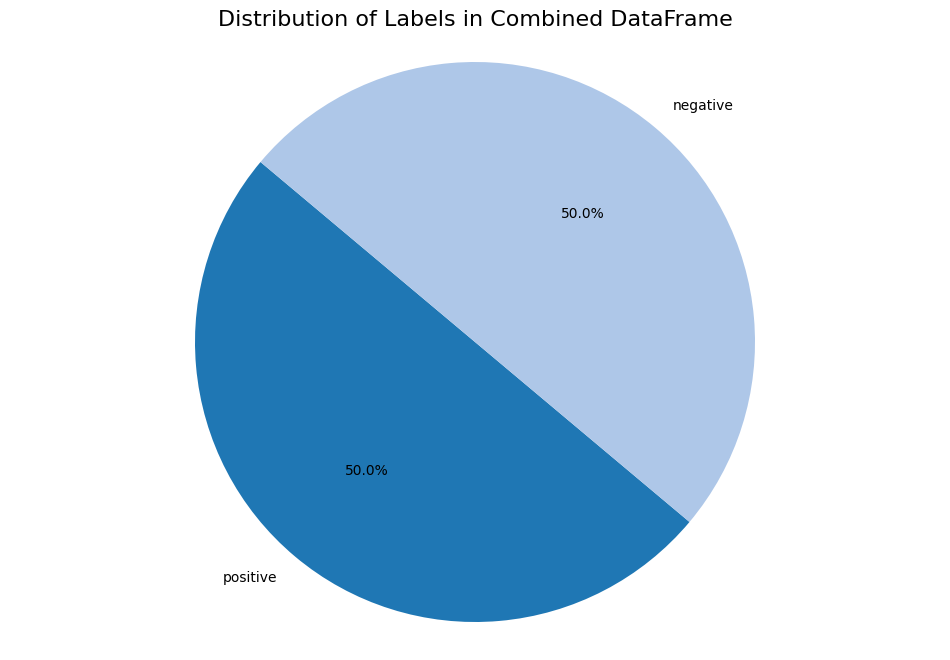

In [70]:
import matplotlib.pyplot as plt

# Plotting a pie chart for label distribution
label_counts = df['sentiment'].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Labels in Combined DataFrame', fontsize=16)
plt.axis('equal')  # Equal aspect ratio to ensure the pie is drawn as a circle
plt.show()


<ipython-input-71-96532171c7ae>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=label_counts.index, x=label_counts.values, palette='viridis', orient='h')


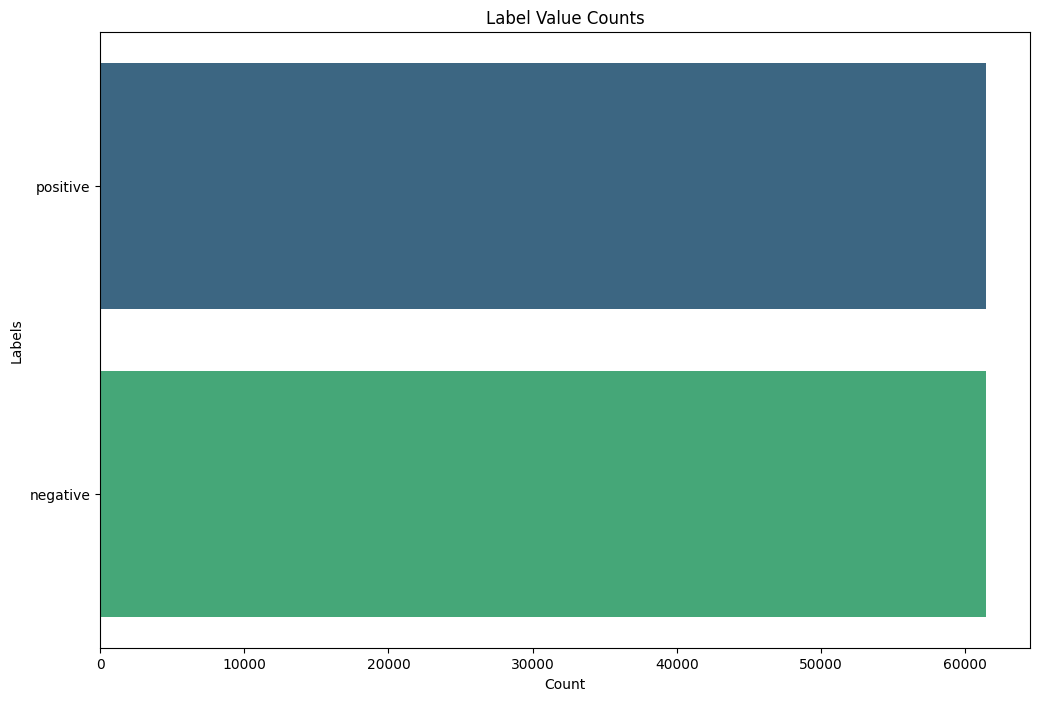

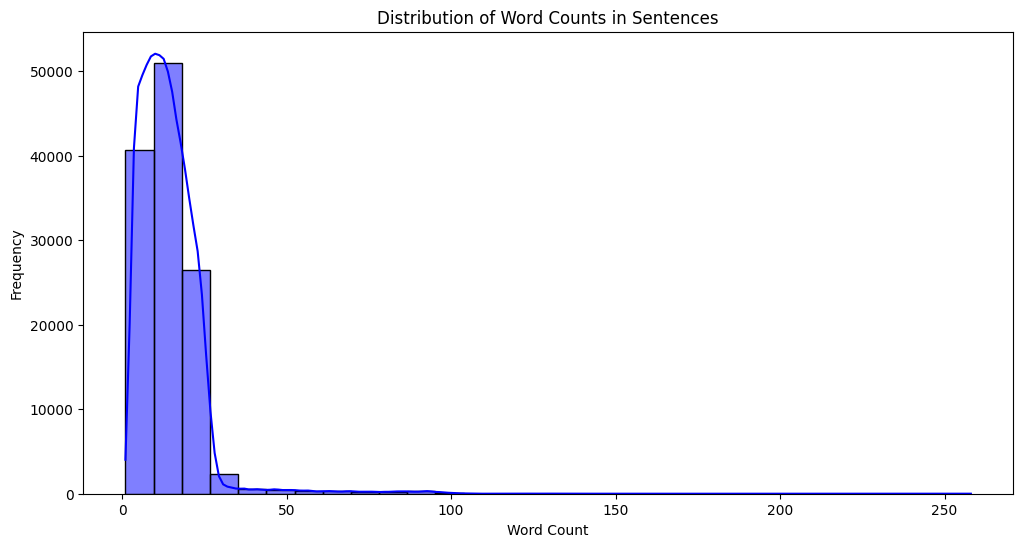

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = df['sentiment'].value_counts()
# Plot the label value counts with horizontal bars (labels on y-axis)
plt.figure(figsize=(12, 8))  # Increased height for better label display
sns.barplot(y=label_counts.index, x=label_counts.values, palette='viridis', orient='h')
plt.title('Label Value Counts')
plt.xlabel('Count')
plt.ylabel('Labels')
plt.show()

# Calculate word count for each sentence and create a new column
df['word_count'] = df['sentence'].apply(lambda x: len(x.split()))

# Plot word count distribution (no change for this plot)
plt.figure(figsize=(12, 6))
sns.histplot(df['word_count'], bins=30, kde=True, color='blue')
plt.title('Distribution of Word Counts in Sentences')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


In [72]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to a single column
df['sentiment'] = le.fit_transform(df['sentiment'])

In [73]:
le.classes_

array(['negative', 'positive'], dtype=object)

In [74]:
df.head(10)

,sentence,sentiment,word_count
0,i meant its a sign to others that he is a cryp...,1,17
1,thank you i tried,1,4
2,omg i really thought it was a new word for me ...,0,18
3,When God created man i also believed he create...,0,20
4,couldnt agree more,0,3
5,ya definitely gotta not feel like a sometimes...,1,9
6,tym is the best place for that kind of thing,1,10
7,Great app I would like to have the option for ...,1,21
8,this makes my tummy sick,0,5
9,my girlfriend hates it when im playing videoga...,0,26


In [75]:
df.drop("word_count",axis=1,inplace=True)

In [77]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df['sentence'],df['sentiment'],test_size=0.3,random_state=50,stratify=df['sentiment'])

In [78]:
print("Training Samples",len(x_train))
print("Testing Samples",len(x_test))

Training Samples 86007
Testing Samples 36861


In [79]:
x_train[:5],y_train[:5]

(76360     its been a long time since that was true but t...
 26260     we all know that everyone was doing the kiki d...
 95822     vista tower is going to be such a cool additio...
 112380                     democratspf are literally hitler
 63832     i told him we werent sick we were just on drug...
 Name: sentence, dtype: object,
 76360     1
 26260     1
 95822     1
 112380    0
 63832     1
 Name: sentiment, dtype: int64)

In [80]:
unique_labels=np.unique(y_train)
unique_labels

array([0, 1])

In [81]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [82]:
def preprocess_function(examples):
    return tokenizer(examples["sentence"], truncation=True)

In [89]:
from datasets import Dataset
train_df = pd.DataFrame({'sentence': x_train, 'label': y_train})
train_dataset = Dataset.from_pandas(train_df)
test_df = pd.DataFrame({'sentence': x_test, 'label': y_test})
test_dataset = Dataset.from_pandas(test_df)

In [ ]:
# del x_train,x_test,y_train,y_test,df_1,train_df

In [94]:
emotions = [
    'negative','positive'
]

# Create mappings
id2label = {i: label for i, label in enumerate(emotions)}
label2id = {label: i for i, label in enumerate(emotions)}

# Print results
print("id2label:", id2label)
print("label2id:", label2id)


id2label: {0: 'negative', 1: 'positive'}
label2id: {'negative': 0, 'positive': 1}


In [103]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [104]:
tokenized_train = train_dataset.map(preprocess_function, batched=True)
tokenized_test = test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/86007 [00:00<?, ? examples/s]

Map:   0%|          | 0/36861 [00:00<?, ? examples/s]

In [ ]:
# del train_dataset,test_dataset

In [105]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert/distilbert-base-uncased", num_labels=2, id2label=id2label, label2id=label2id
)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [106]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.1 MB/s eta 0:00:00


In [107]:
import evaluate

accuracy = evaluate.load("accuracy")

In [108]:
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [109]:
import os
os.environ["WANDB_DISABLED"] = "True"

In [111]:
from transformers import EarlyStoppingCallback
training_args = TrainingArguments(
    output_dir="my_awesome_model",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=10,
    weight_decay=0.01,
    eval_strategy="epoch",  # ✅ updated
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
    report_to="none"  # ✅ updated
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    # tokenizer=tokenizer,  # optional, good for saving
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)],
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

history = trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy
1,0.185700,0.722457,0.837660
2,0.171100,0.689919,0.832207
3,0.162900,0.770682,0.832533
4,0.143300,0.882510,0.831258


In [112]:
evaluate.load("f1")
evaluate.load("precision")
evaluate.load("recall")


EvaluationModule(name: "recall", module_type: "metric", features: {'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}, usage: """
Args:
- **predictions** (`list` of `int`): The predicted labels.
- **references** (`list` of `int`): The ground truth labels.
- **labels** (`list` of `int`): The set of labels to include when `average` is not set to `binary`, and their order when average is `None`. Labels present in the data can be excluded in this input, for example to calculate a multiclass average ignoring a majority negative class, while labels not present in the data will result in 0 components in a macro average. For multilabel targets, labels are column indices. By default, all labels in y_true and y_pred are used in sorted order. Defaults to None.
- **pos_label** (`int`): The class label to use as the 'positive class' when calculating the recall. Defaults to `1`.
- **average** (`string`): This parameter is required for multiclass/multilabel tar

In [113]:
trainer.evaluate()


{'eval_loss': 0.6899192333221436,
 'eval_accuracy': 0.8322074821627194,
 'eval_runtime': 56.6706,
 'eval_samples_per_second': 650.443,
 'eval_steps_per_second': 40.656,
 'epoch': 4.0}

In [114]:
print(history)

TrainOutput(global_step=21504, training_loss=0.15470189399950737, metrics={'train_runtime': 2104.7267, 'train_samples_per_second': 408.637, 'train_steps_per_second': 25.543, 'total_flos': 4241785660384392.0, 'train_loss': 0.15470189399950737, 'epoch': 4.0})


In [115]:
save_path='/content/drive/MyDrive/DistilBERTGoEmotions_Pytorch_90_10'
model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)

('/content/drive/MyDrive/DistilBERTGoEmotions_Pytorch_90_10/tokenizer_config.json',
 '/content/drive/MyDrive/DistilBERTGoEmotions_Pytorch_90_10/special_tokens_map.json',
 '/content/drive/MyDrive/DistilBERTGoEmotions_Pytorch_90_10/vocab.txt',
 '/content/drive/MyDrive/DistilBERTGoEmotions_Pytorch_90_10/added_tokens.json',
 '/content/drive/MyDrive/DistilBERTGoEmotions_Pytorch_90_10/tokenizer.json')

In [116]:
# text="that game hurt"#sadness
text="right considering it’s such an important document i should know the damned thing backwards and forwards thanks again for the help" #gratitude

In [117]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(save_path)
inputs = tokenizer(text, return_tensors="pt")

In [118]:
from transformers import AutoModelForSequenceClassification
import torch

model = AutoModelForSequenceClassification.from_pretrained(save_path)
with torch.no_grad():
    logits = model(**inputs).logits

In [119]:
predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]

'positive'

In [120]:
import torch
import numpy as np

# Perform prediction using the model on the tokenized test dataset
def inference(text):
    with torch.no_grad():  # No need for gradients during inference
        inputs = tokenizer(text, return_tensors="pt")
        logits = model(**inputs).logits
        predicted_class_id = logits.argmax().item()
        return predicted_class_id




In [122]:
# Perform prediction on each text in test_df and store the predicted labels
from tqdm import tqdm

predicted_labels = []

for text in tqdm(test_df["sentence"], desc="Predicting Labels", unit="sentence"):
    predicted_class_id = inference(text)  # Call the inference function
    predicted_labels.append(predicted_class_id)

# Convert predicted and true labels to numpy arrays
y_pred = np.array(predicted_labels)
y_true = test_df["label"].values

# Calculate accuracy
accuracy = np.mean(y_pred == y_true)
print("Accuracy:", accuracy)

Predicting Labels:   1%|          | 412/36861 [00:37<55:26, 10.96sentence/s]  


KeyboardInterrupt: 

In [123]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy}')


NameError: name 'y_true' is not defined

In [ ]:
from sklearn.metrics import precision_score

precision_macro = precision_score(y_true, y_pred, average='macro')
precision_micro = precision_score(y_true, y_pred, average='micro')
precision_weighted = precision_score(y_true, y_pred, average='weighted')

print(f'Macro Precision: {precision_macro:.2f}')
print(f'Micro Precision: {precision_micro:.2f}')
print(f'Weighted Precision: {precision_weighted:.2f}')

from sklearn.metrics import recall_score, f1_score

# Assuming you have y_true (true labels) and y_pred (predicted labels)
# Example placeholder data:
# y_true = ... (true labels)
# y_pred = ... (predicted labels)

# Calculate Recall for each class
recall_macro = recall_score(y_true, y_pred, average='macro')
recall_micro = recall_score(y_true, y_pred, average='micro')
recall_weighted = recall_score(y_true, y_pred, average='weighted')

print(f'Macro Recall: {recall_macro:.2f}')
print(f'Micro Recall: {recall_micro:.2f}')
print(f'Weighted Recall: {recall_weighted:.2f}')

# Calculate F1 Score for each class
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_micro = f1_score(y_true, y_pred, average='micro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')

print(f'Macro F1 Score: {f1_macro:.2f}')
print(f'Micro F1 Score: {f1_micro:.2f}')
print(f'Weighted F1 Score: {f1_weighted:.2f}')


In [ ]:
from sklearn.metrics import roc_auc_score
import tensorflow as tf

# Convert labels to one-hot encoding
num_classes = 2
# Convert to one-hot encoding for multi-class ROC AUC calculation
y_true_one_hot = tf.keras.utils.to_categorical(y_true, num_classes=num_classes)
y_pred_one_hot = tf.keras.utils.to_categorical(y_pred, num_classes=num_classes)

# Compute AUC-ROC
auc_roc = roc_auc_score(y_true_one_hot, y_pred_one_hot, average='weighted', multi_class='ovr')
print(f'AUC-ROC: {auc_roc}')


In [ ]:
from sklearn.metrics import matthews_corrcoef

# Compute MCC
mcc = matthews_corrcoef(y_true, y_pred)
print(f'Matthews Correlation Coefficient: {mcc}')


In [ ]:
from sklearn.metrics import hamming_loss

# Compute Hamming Loss
hamming_loss_val = hamming_loss(y_true, y_pred)
print(f'Hamming Loss: {hamming_loss_val}')


In [ ]:
from sklearn.metrics import cohen_kappa_score

# Compute Cohen's Kappa
cohen_kappa = cohen_kappa_score(y_true, y_pred)
print(f"Cohen's Kappa: {cohen_kappa}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Create a heatmap with customized settings to handle many classes
plt.figure(figsize=(15, 12))  # Adjusting figure size for better readability
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, square=True,
            xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))

# Add labels and title
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)

# Rotate tick labels for better visualization
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Display the heatmap
plt.tight_layout()  # Adjust layout to prevent clipping of tick labels
plt.show()


In [124]:
from sklearn.metrics import classification_report

# Compute Classification Report
class_report = classification_report(y_true, y_pred)
print(f'Classification Report: \n{class_report}')


NameError: name 'y_true' is not defined